<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/bestlstm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


In [2]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [3]:
df=pd.read_excel("/content/pv_10.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [4]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	10
Rejected: 	23
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	

BorutaPy(estimator=RandomForestRegressor(max_depth=7, n_estimators=101,
                                         random_state=RandomState(MT19937) at 0x7F8CB8A30050),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F8CB8A30050, verbose=2)

In [5]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.4, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)

In [6]:
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [31]:
def define_model1(hp):


  # firs
  fe1_0 = LSTM(hp.Int('input_unit11',min_value=8,max_value=64,step=2), activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(hp.Float('Dropout_rate1',min_value=0.2,max_value=0.6,step=0.1))(fe1_0)
  #fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)
  #fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(hp.Int('input_unit12',min_value=8,max_value=64,step=2), activation='relu')(fe1_1)
  out1_1=Dense(1, activation='linear')(fe1_4)



  fe2_0 = LSTM(hp.Int('input_unit21',min_value=8,max_value=64,step=4), activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(hp.Float('Dropout_rate2',min_value=0.2,max_value=0.6,step=0.1))(fe2_0)
  #fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
  #fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(hp.Int('input_unit22',min_value=8,max_value=64,step=4), activation='relu')(fe2_1)
  out2_1=Dense(1, activation='linear')(fe2_4)

  fe3_0 = LSTM(hp.Int('input_unit31',min_value=8,max_value=64,step=4), activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(hp.Float('Dropout_rate3',min_value=0.2,max_value=0.6,step=0.1))(fe3_0)
  #fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
  #fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(hp.Int('input_unit32',min_value=8,max_value=64,step=2), activation='relu')(fe3_1)
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
 
  return model


In [8]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 49.8 MB/s 


In [9]:
import keras_tuner as kt

In [32]:
tuner = kt.RandomSearch(
    define_model1,
    objective='mse',
    max_trials=10,
    executions_per_trial=1
    )

In [33]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=50,
        batch_size=64,
        validation_data=(X_test,y_test)
)


Trial 11 Complete [00h 01m 31s]
mse: 0.00232720747590065

Best mse So Far: 0.001984996721148491
Total elapsed time: 00h 01m 31s


77/77 [==============================] - 2s 7ms/step
0.06690120904084176


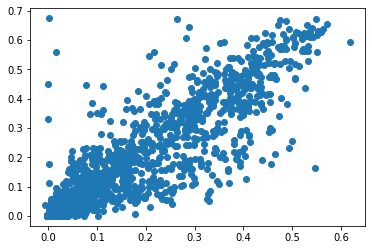

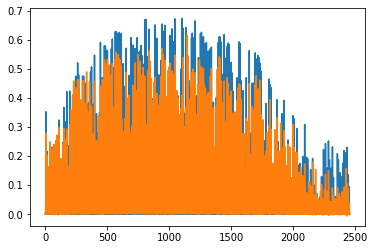

In [14]:
best_model = tuner.get_best_models(num_models=1)[0]
y1=best_model.predict(X_test)
print(np.sqrt(mean_squared_error(y1,y_test)))
plt.scatter(y1,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y1))]
df_2['Actual']=y_test
df_2['Predicted']=y1
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()

77/77 [==============================] - 1s 3ms/step
0.06670526390350566


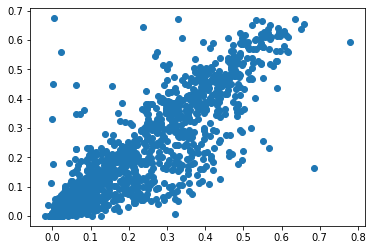

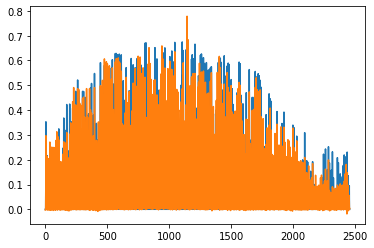

In [17]:
best_model = tuner.get_best_models(num_models=1)[0]
y1=best_model.predict(X_test)
print(np.sqrt(mean_squared_error(y1,y_test)))
plt.scatter(y1,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y1))]
df_2['Actual']=y_test
df_2['Predicted']=y1
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()

In [12]:
def define_model2(hp):


  # firs
  fe1_0 = LSTM(hp.Int('input_unit11',min_value=8,max_value=64,step=2), activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(hp.Float('Dropout_rate1',min_value=0.2,max_value=0.5,step=0.1))(fe1_0)
  #fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)
  #fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(hp.Int('input_unit12',min_value=4,max_value=64,step=2), activation='relu')(fe1_1)
  out1_1=Dense(1, activation='linear')(fe1_4)



  fe2_0 = LSTM(hp.Int('input_unit21',min_value=8,max_value=64,step=2), activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(hp.Float('Dropout_rate2',min_value=0.2,max_value=0.5,step=0.1))(fe2_0)
  #fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
  #fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(hp.Int('input_unit22',min_value=4,max_value=64,step=2), activation='relu')(fe2_1)
  out2_1=Dense(1, activation='linear')(fe2_4)

  fe3_0 = LSTM(hp.Int('input_unit31',min_value=8,max_value=64,step=2), activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(hp.Float('Dropout_rate3',min_value=0.2,max_value=0.5,step=0.1))(fe3_0)
  #fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
  #fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(hp.Int('input_unit32',min_value=4,max_value=64,step=2), activation='relu')(fe3_1)
  out3_1=Dense(1, activation='linear')(fe3_4)
 
 

  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='linear')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
 
  return model

In [13]:
tuner1 = kt.RandomSearch(
    define_model2,
    objective='mse',
    max_trials=10,
    executions_per_trial=3
    )

In [14]:
tuner1.search(
        x=X_train,
        y=y_train,
        epochs=75,
        batch_size=64,
        validation_data=(X_test,y_test)
)


Trial 2 Complete [00h 03m 57s]
mse: 0.0034748322796076536

Best mse So Far: 0.003414643850798408
Total elapsed time: 00h 07m 20s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
26                |30                |input_unit11
0.4               |0.3               |Dropout_rate1
24                |16                |input_unit12
32                |40                |input_unit21
0.3               |0.3               |Dropout_rate2
28                |16                |input_unit22
24                |16                |input_unit31
0.4               |0.2               |Dropout_rate3
8                 |12                |input_unit32

Epoch 1/50
58/58 [==============================] - 10s 34ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 2/50
58/58 [==============================] - 1s 16ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 3/50
58/58 [==============================] - 1s 16ms/step 

KeyboardInterrupt: ignored

In [ ]:
'''def get_model11(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model21(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model31(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model11() 
model2 = get_model21() 
model3 = get_model31()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model1 = Model(inputs=inputs1, outputs=outputs)
ensemble_model1.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history1=ensemble_model1.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y1=ensemble_model1.predict(X_test)
print(np.sqrt(mean_squared_error(y1,y_test)))
plt.scatter(y1,y_test)
plt.show()
df_1 = pd.DataFrame()
df_1['time']=[i for i in range(len(y1))]
df_1['Actual']=y_test
df_1['Predicted']=y1
import matplotlib.pyplot as plt
plt.plot(df_1['time'],df_1['Actual'])
plt.plot(df_1['time'],df_1['Predicted'])
plt.show()
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='val')'''


In [ ]:
'''def get_model12(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = LSTM(32, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model22(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(32, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model32(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.7)(fe3_0)
    fe3_2 = LSTM(32, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.7)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model12() 
model2 = get_model22() 
model3 = get_model32()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model2 = Model(inputs=inputs1, outputs=outputs)
ensemble_model2.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history2=ensemble_model2.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y2=ensemble_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y2,y_test)))
plt.scatter(y2,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y2))]
df_2['Actual']=y_test
df_2['Predicted']=y2
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()'''


In [ ]:
'''def get_model12(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model11_(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model22(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model11(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)'''
'''model1 = get_model12() 
#model2 = get_model11_() 
model3 = get_model22()
#model4 = get_model11()
y1 = model1(inputs1) 
y2 = model3(inputs1) 
#y3 = model3(inputs1)
#y4 = model4(inputs1)
outputs = layers.average([y1, y2]) 
ensemble_model2 = Model(inputs=inputs1, outputs=outputs)
ensemble_model2.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history2=ensemble_model2.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y2=ensemble_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y2,y_test)))
plt.scatter(y2,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y2))]
df_2['Actual']=y_test
df_2['Predicted']=y2
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()'''


In [ ]:
'''def get_model12(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = LSTM(32, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model22(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(32, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model32(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.7)(fe3_0)
    fe3_2 = LSTM(32, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.7)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
def get_model42(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.7)(fe3_0)
    fe3_2 = LSTM(32, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.7)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model12() 
model2 = get_model22() 
model3 = get_model32()
model4 = get_model42()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
y4 = model4(inputs1)
outputs = layers.average([y1, y2, y3,y4]) 
ensemble_model2 = Model(inputs=inputs1, outputs=outputs)
ensemble_model2.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history2=ensemble_model2.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y2=ensemble_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y2,y_test)))
plt.scatter(y2,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y2))]
df_2['Actual']=y_test
df_2['Predicted']=y2
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()'''


Epoch 1/100
47/47 [==============================] - 9s 38ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/100
47/47 [==============================] - 1s 16ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/100
47/47 [==============================] - 1s 18ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 8/100
47/47 [==============================] - 1s 15ms/step - loss: 0.

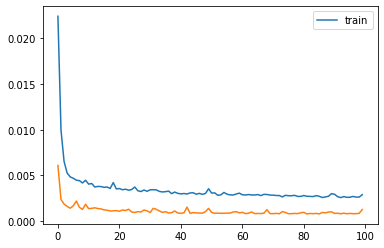

77/77 [==============================] - 1s 4ms/step


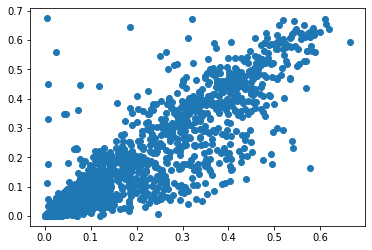

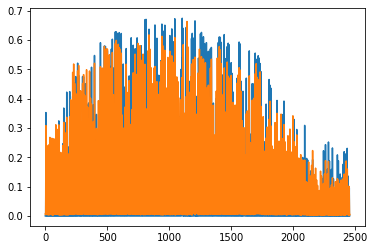

In [36]:
def define_model_():


  # firs
  fe1_0 = LSTM(34, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.3)(fe1_0)
  #fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)
  #fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(12, activation='relu')(fe1_1)
  out1_1=Dense(1, activation='linear')(fe1_4)



  fe2_0 = LSTM(40, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.4)(fe2_0)
  #fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
  #fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(32, activation='relu')(fe2_1)
  out2_1=Dense(1, activation='linear')(fe2_4)

  fe3_0 = LSTM(24, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  #fe3_2 = LSTM(8, activation='relu',return_sequences = True)(fe3_1)
  #fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(16, activation='relu')(fe3_1)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model_()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size = 64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()

In [37]:
print(np.sqrt(mean_squared_error(y,y_test)))

0.06788486737602545
